## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  47.015147   179.159284  0.369812  2.670330    81.238343
1  25.917511   584.275066  0.695678  8.309874   407.496751
2  53.166973  1323.323946  0.766343  5.882084  1015.416543
3  11.731511  1752.166635  0.741449  6.882925  1299.142036
4  23.451783  1413.635141  0.773009  4.678068  1093.093460


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9820440	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9696556	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9583844	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9461581	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9343839	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9213246	total: 60.5ms	remaining: 10s
6:	learn: 0.9071536	total: 61.1ms	remaining: 8.66s
7:	learn: 0.8951408	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8843393	total: 62.3ms	remaining: 6.86s
9:	learn: 0.8714442	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8588952	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8445869	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8327267	total: 64ms	remaining: 4.86s
13:	learn: 0.8203288	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8109954	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8023755	total: 65.5ms	remaining: 4.03s


16:	learn: 0.7917054	total: 66.4ms	remaining: 3.84s
17:	learn: 0.7827810	total: 67ms	remaining: 3.66s
18:	learn: 0.7760140	total: 67.5ms	remaining: 3.48s
19:	learn: 0.7637109	total: 68ms	remaining: 3.33s
20:	learn: 0.7522584	total: 68.5ms	remaining: 3.19s
21:	learn: 0.7434322	total: 68.9ms	remaining: 3.06s
22:	learn: 0.7345428	total: 69.4ms	remaining: 2.95s
23:	learn: 0.7246333	total: 69.9ms	remaining: 2.84s
24:	learn: 0.7166628	total: 70.4ms	remaining: 2.75s
25:	learn: 0.7067190	total: 70.9ms	remaining: 2.65s
26:	learn: 0.6993485	total: 71.3ms	remaining: 2.57s
27:	learn: 0.6925698	total: 71.6ms	remaining: 2.49s
28:	learn: 0.6834898	total: 71.9ms	remaining: 2.41s
29:	learn: 0.6745463	total: 72.3ms	remaining: 2.34s
30:	learn: 0.6668653	total: 72.7ms	remaining: 2.27s
31:	learn: 0.6575711	total: 73.2ms	remaining: 2.21s
32:	learn: 0.6501701	total: 73.7ms	remaining: 2.16s
33:	learn: 0.6430469	total: 74.4ms	remaining: 2.11s
34:	learn: 0.6354098	total: 74.7ms	remaining: 2.06s
35:	learn: 0.626

279:	learn: 0.0688569	total: 183ms	remaining: 469ms
280:	learn: 0.0684506	total: 183ms	remaining: 469ms
281:	learn: 0.0679429	total: 184ms	remaining: 468ms
282:	learn: 0.0677184	total: 184ms	remaining: 467ms
283:	learn: 0.0672732	total: 185ms	remaining: 466ms
284:	learn: 0.0670636	total: 185ms	remaining: 464ms
285:	learn: 0.0666489	total: 185ms	remaining: 463ms
286:	learn: 0.0662470	total: 186ms	remaining: 462ms
287:	learn: 0.0657848	total: 186ms	remaining: 460ms
288:	learn: 0.0654152	total: 187ms	remaining: 460ms
289:	learn: 0.0651132	total: 187ms	remaining: 459ms
290:	learn: 0.0646965	total: 188ms	remaining: 457ms
291:	learn: 0.0642841	total: 188ms	remaining: 456ms
292:	learn: 0.0640891	total: 189ms	remaining: 456ms
293:	learn: 0.0638599	total: 189ms	remaining: 455ms
294:	learn: 0.0635394	total: 190ms	remaining: 454ms
295:	learn: 0.0631899	total: 190ms	remaining: 453ms
296:	learn: 0.0627713	total: 191ms	remaining: 452ms
297:	learn: 0.0625744	total: 191ms	remaining: 450ms
298:	learn: 

420:	learn: 0.0351094	total: 243ms	remaining: 335ms
421:	learn: 0.0349056	total: 244ms	remaining: 334ms
422:	learn: 0.0347091	total: 245ms	remaining: 334ms
423:	learn: 0.0345657	total: 245ms	remaining: 333ms
424:	learn: 0.0344244	total: 245ms	remaining: 332ms
425:	learn: 0.0343554	total: 246ms	remaining: 331ms
426:	learn: 0.0341473	total: 246ms	remaining: 331ms
427:	learn: 0.0339571	total: 247ms	remaining: 330ms
428:	learn: 0.0337984	total: 247ms	remaining: 329ms
429:	learn: 0.0336905	total: 248ms	remaining: 328ms
430:	learn: 0.0335062	total: 248ms	remaining: 328ms
431:	learn: 0.0333108	total: 249ms	remaining: 327ms
432:	learn: 0.0332134	total: 249ms	remaining: 326ms
433:	learn: 0.0331098	total: 250ms	remaining: 326ms
434:	learn: 0.0329786	total: 250ms	remaining: 325ms
435:	learn: 0.0328493	total: 251ms	remaining: 324ms
436:	learn: 0.0327254	total: 251ms	remaining: 324ms
437:	learn: 0.0326627	total: 252ms	remaining: 323ms
438:	learn: 0.0326002	total: 252ms	remaining: 322ms
439:	learn: 

645:	learn: 0.0155126	total: 343ms	remaining: 188ms
646:	learn: 0.0154852	total: 344ms	remaining: 188ms
647:	learn: 0.0154338	total: 344ms	remaining: 187ms
648:	learn: 0.0154201	total: 345ms	remaining: 186ms
649:	learn: 0.0154065	total: 345ms	remaining: 186ms
650:	learn: 0.0153701	total: 345ms	remaining: 185ms
651:	learn: 0.0153566	total: 346ms	remaining: 185ms
652:	learn: 0.0153434	total: 346ms	remaining: 184ms
653:	learn: 0.0153303	total: 347ms	remaining: 183ms
654:	learn: 0.0152755	total: 347ms	remaining: 183ms
655:	learn: 0.0152381	total: 348ms	remaining: 182ms
656:	learn: 0.0152231	total: 348ms	remaining: 182ms
657:	learn: 0.0152083	total: 348ms	remaining: 181ms
658:	learn: 0.0151243	total: 349ms	remaining: 181ms
659:	learn: 0.0150967	total: 349ms	remaining: 180ms
660:	learn: 0.0150823	total: 350ms	remaining: 179ms
661:	learn: 0.0150552	total: 350ms	remaining: 179ms
662:	learn: 0.0150409	total: 350ms	remaining: 178ms
663:	learn: 0.0150268	total: 351ms	remaining: 178ms
664:	learn: 

791:	learn: 0.0111813	total: 403ms	remaining: 106ms
792:	learn: 0.0111423	total: 404ms	remaining: 105ms
793:	learn: 0.0111239	total: 404ms	remaining: 105ms
794:	learn: 0.0110673	total: 405ms	remaining: 104ms
795:	learn: 0.0110450	total: 405ms	remaining: 104ms
796:	learn: 0.0110233	total: 405ms	remaining: 103ms
797:	learn: 0.0109717	total: 406ms	remaining: 103ms
798:	learn: 0.0109156	total: 406ms	remaining: 102ms
799:	learn: 0.0108946	total: 407ms	remaining: 102ms
800:	learn: 0.0108382	total: 407ms	remaining: 101ms
801:	learn: 0.0107840	total: 408ms	remaining: 101ms
802:	learn: 0.0107311	total: 408ms	remaining: 100ms
803:	learn: 0.0107013	total: 408ms	remaining: 99.6ms
804:	learn: 0.0106499	total: 409ms	remaining: 99ms
805:	learn: 0.0105997	total: 409ms	remaining: 98.5ms
806:	learn: 0.0105508	total: 409ms	remaining: 97.9ms
807:	learn: 0.0104991	total: 410ms	remaining: 97.4ms
808:	learn: 0.0104858	total: 410ms	remaining: 96.9ms
809:	learn: 0.0104726	total: 411ms	remaining: 96.4ms
810:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

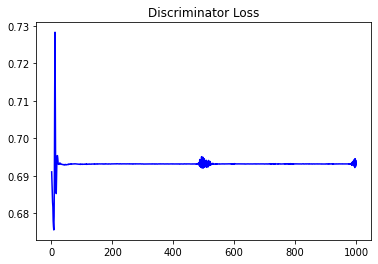

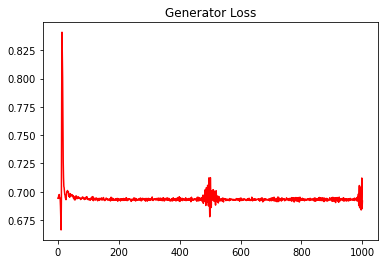

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.013683506545977952


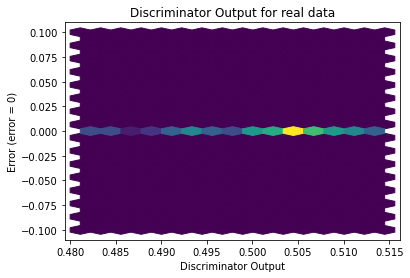

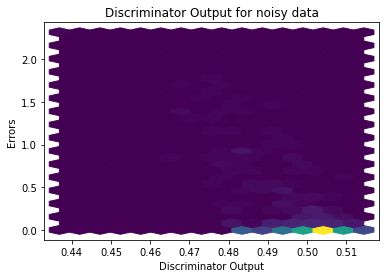

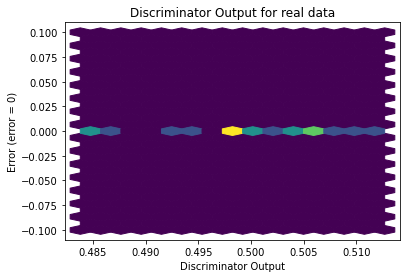

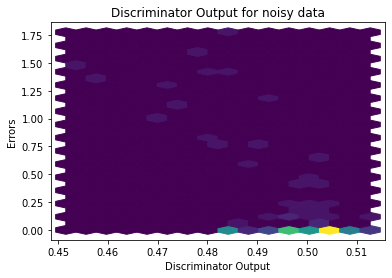

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


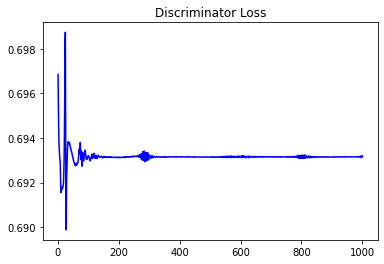

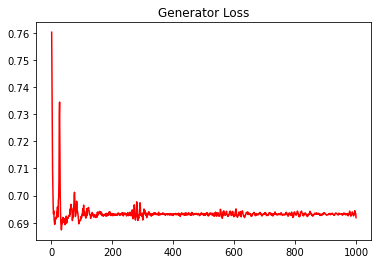

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03467178286235201


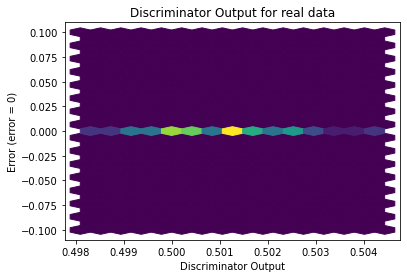

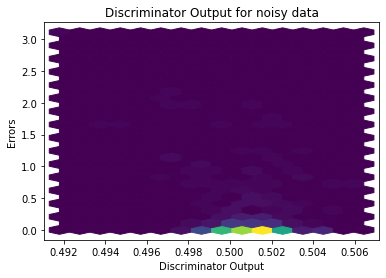

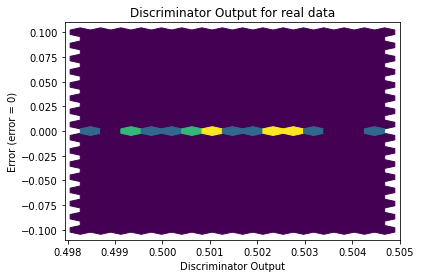

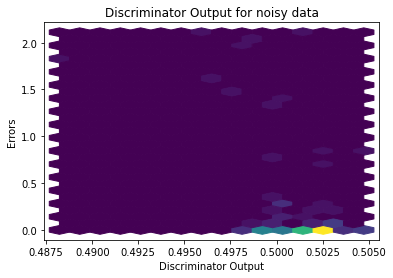

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0618]], requires_grad=True)
